# Q1 Visualizing Chipotle's Data

In [2]:
#Step 1. Import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#Step 2: Import the dataset from the provided address
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'

In [4]:
#Step 3. Assign it to a variable called chipo.
chipo = pd.read_csv(url, sep='\t')

In [5]:
#Step 4. See the first 10 entries
print(chipo.head(10))

   order_id  quantity                              item_name  \
0         1         1           Chips and Fresh Tomato Salsa   
1         1         1                                   Izze   
2         1         1                       Nantucket Nectar   
3         1         1  Chips and Tomatillo-Green Chili Salsa   
4         2         2                           Chicken Bowl   
5         3         1                           Chicken Bowl   
6         3         1                          Side of Chips   
7         4         1                          Steak Burrito   
8         4         1                       Steak Soft Tacos   
9         5         1                          Steak Burrito   

                                  choice_description item_price  
0                                                NaN     $2.39   
1                                       [Clementine]     $3.39   
2                                            [Apple]     $3.39   
3                              

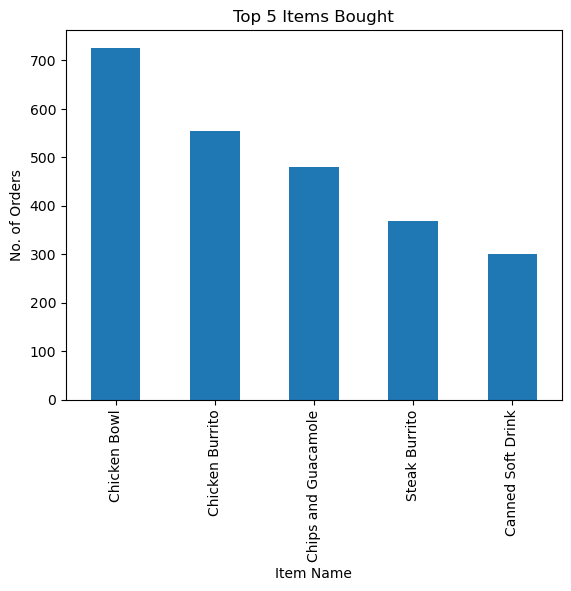

In [8]:
#Step 5. Create a histogram of the top 5 items bought
items = chipo['item_name'].value_counts().head(5)
items.plot(kind='bar', title='Top 5 Items Bought')
plt.xlabel('Item Name')
plt.ylabel('No. of Orders')
plt.show()

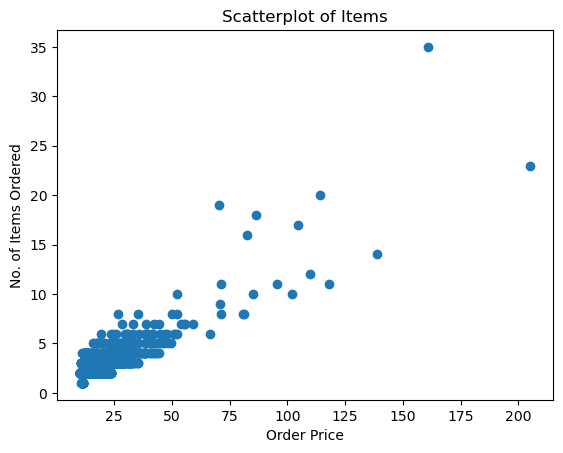

In [14]:
#Step 6. Create a scatterplot with the number of items orderered per order price
scatter_data = chipo.groupby('order_id').agg({'item_price': 'sum', 'quantity': 'sum'})
plt.scatter(scatter_data['item_price'], scatter_data['quantity'])
plt.title('Scatterplot of Items')
plt.xlabel('Order Price')
plt.ylabel('No. of Items Ordered')
plt.show()

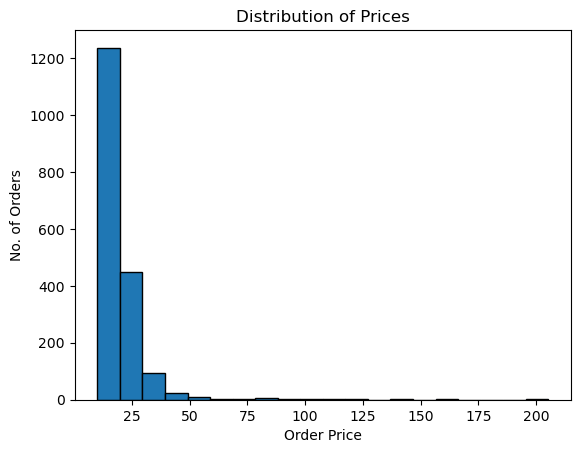

In [15]:
#Step 7. BONUS: Create a question and a graph to answer your own question.
plt.hist(chipo.groupby('order_id')['item_price'].sum(), bins=20, edgecolor='black')
plt.title('Distribution of Prices')
plt.xlabel('Order Price')
plt.ylabel('No. of Orders')
plt.show()

# Q2 - Online Retails Purchase

In [16]:
#Step 1. Import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
#Step 2. Import the dataset from this address.
url ='https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Online_Retail/Online_Retail.csv'

In [18]:
#Step 3. Assign it to a variable called online_rt
online_rt = pd.read_csv(url, encoding='latin1')

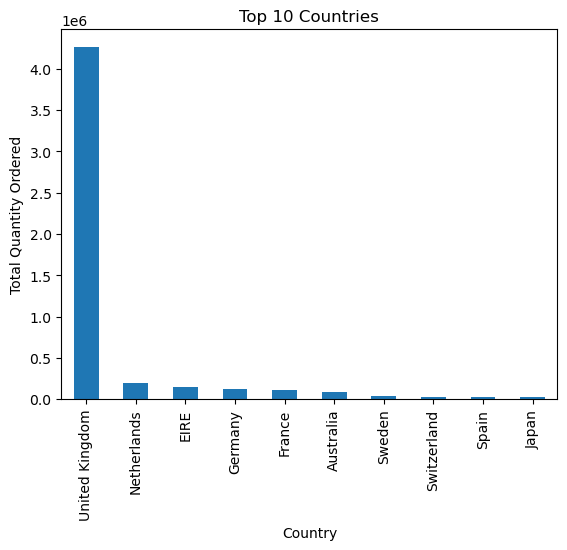

In [21]:
#Step 4. Create a histogram with the 10 countries that have the most 'Quantity' ordered except UK
countries = online_rt[online_rt['Country'] != 'UK'].groupby('Country')['Quantity'].sum().nlargest(10)
countries.plot(kind='bar', title='Top 10 Countries')
plt.xlabel('Country')
plt.ylabel('Total Quantity Ordered')
plt.show()

In [22]:
#Step 5. Exclude negative Quantity entries
online_rt = online_rt[online_rt['Quantity'] > 0]

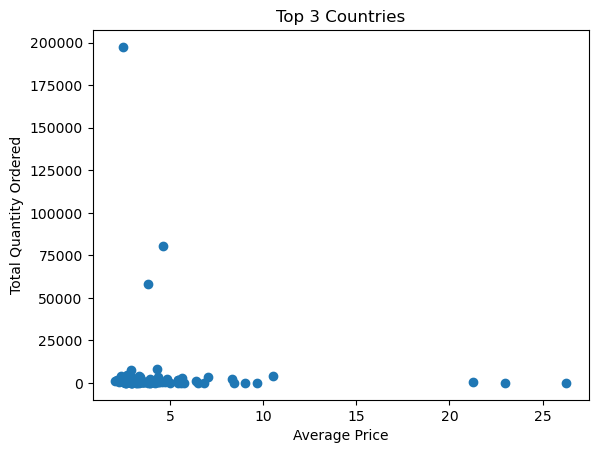

In [23]:
#Step 6. Create a scatterplot with the Quantity per UnitPrice by CustomerID for the top 3 Countries (except UK)
countries = online_rt[online_rt['Country'].isin(['Netherlands', 'EIRE', 'Germany'])]
data = countries.groupby(['CustomerID', 'Country']).agg({'Quantity': 'sum', 'UnitPrice': 'mean'})
plt.scatter(data['UnitPrice'], data['Quantity'])
plt.title('Top 3 Countries')
plt.xlabel('Average Price')
plt.ylabel('Total Quantity Ordered')
plt.show()

In [24]:
#Step 7. Investigate why the previous results look so uninformative.
#Step 7.1.1 Display the first few rows of that DataFrame
print(countries.head())

     InvoiceNo StockCode                          Description  Quantity  \
385     536403     22867              HAND WARMER BIRD DESIGN        96   
386     536403      POST                              POSTAGE         1   
1109    536527     22809              SET OF 6 T-LIGHTS SANTA         6   
1110    536527     84347  ROTATING SILVER ANGELS T-LIGHT HLDR         6   
1111    536527     84945   MULTI COLOUR SILVER T-LIGHT HOLDER        12   

        InvoiceDate  UnitPrice  CustomerID      Country  
385   12/1/10 11:27       1.85     12791.0  Netherlands  
386   12/1/10 11:27      15.00     12791.0  Netherlands  
1109  12/1/10 13:04       2.95     12662.0      Germany  
1110  12/1/10 13:04       2.55     12662.0      Germany  
1111  12/1/10 13:04       0.85     12662.0      Germany  


In [25]:
#Step 7.1.2 Think about what that piece of code does and display the dtype of UnitPrice
print(countries['UnitPrice'].dtype)

float64


In [26]:
#Step 7.1.3 Pull data from online_rt for CustomerID s 12346.0 and 12347.0.
print(countries[countries['CustomerID'].isin([12346.0, 12347.0])])

Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country]
Index: []


In [27]:
#Step 7.2 Reinterpreting the initial problem.
#Step 7.2.1 Find out the top 3 countries in terms of sales volume.
countries_sales_volume = online_rt.groupby('Country')['Quantity'].sum().nlargest(3)
print(countries_sales_volume)

Country
United Kingdom    4733819
Netherlands        200937
EIRE               147447
Name: Quantity, dtype: int64


In [24]:
#Step 7.3 Modify, select and plot data
#Step 7.3.1 Add a column to online_rt called Revenue calculate the revenue (Quantity * UnitPrice) from each sale.
online_rt['Revenue'] = online_rt['Quantity'] * online_rt['UnitPrice']

In [31]:
#Step 7.3.2 Group by CustomerID and Country and find out the average price ( AvgPrice ) each customer spends per unit.
customer = online_rt.groupby(['CustomerID', 'Country']).agg({'UnitPrice': 'sum', 'Quantity': 'sum'})
customer['AvgPrice'] = customer['UnitPrice'] / customer['Quantity']
print(online_rt.columns)

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')


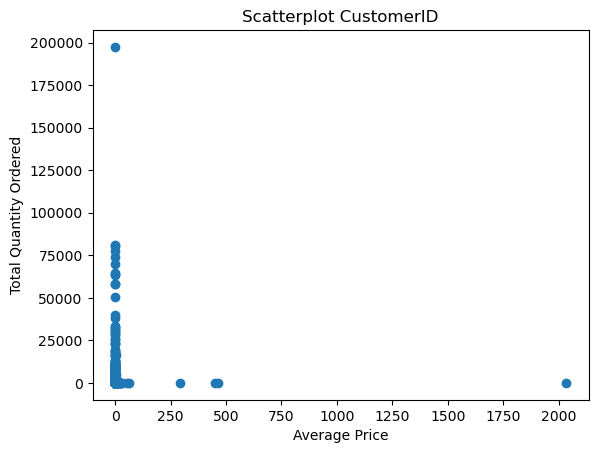

In [34]:
#Step 7.3.3 Plot
plt.scatter(customer['AvgPrice'], customer['Quantity'])
plt.title('Scatterplot CustomerID')
plt.xlabel('Average Price')
plt.ylabel('Total Quantity Ordered')
plt.show()

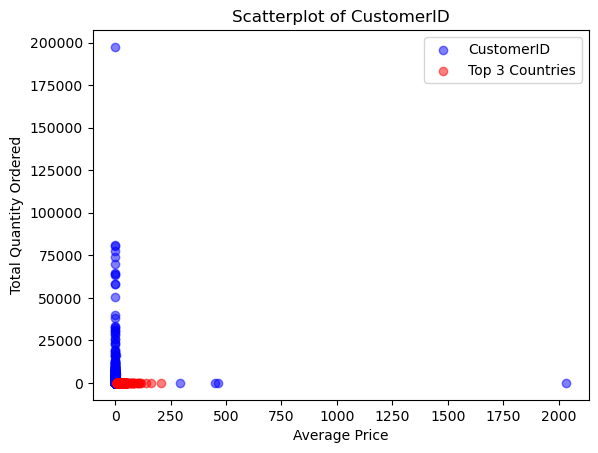

In [47]:
#Step 7.4 What to do now?
#Step 7.4.1 Plot the data for each CustomerID on a single graph
plt.scatter(customer['AvgPrice'], customer['Quantity'], c='blue', alpha=0.5, label='CustomerID')
plt.scatter(scatter_data['item_price'], scatter_data['quantity'], c='red', alpha=0.5, label='Top 3 Countries')
plt.title('Scatterplot of CustomerID')
plt.xlabel('Average Price')
plt.ylabel('Total Quantity Ordered')
plt.legend()
plt.show()

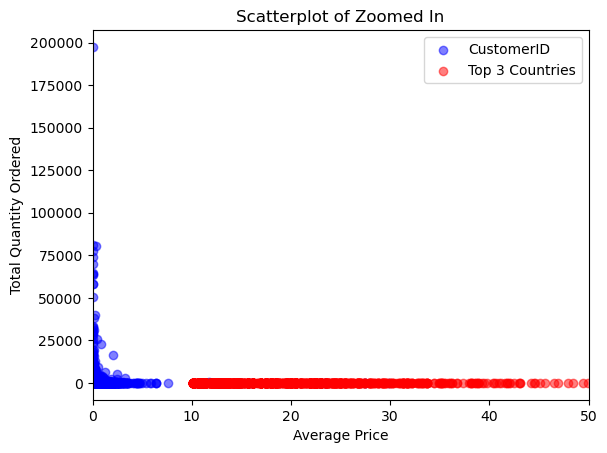

In [49]:
#Step 7.4.2 Zoom in so we can see that curve more clearly
plt.scatter(customer['AvgPrice'], customer['Quantity'], c='blue', alpha=0.5, label='CustomerID')
plt.scatter(scatter_data['item_price'], scatter_data['quantity'], c='red', alpha=0.5, label='Top 3 Countries')
plt.title('Scatterplot of Zoomed In')
plt.xlabel('Average Price')
plt.ylabel('Total Quantity Ordered')
plt.legend()
plt.xlim(0, 50)
plt.show()

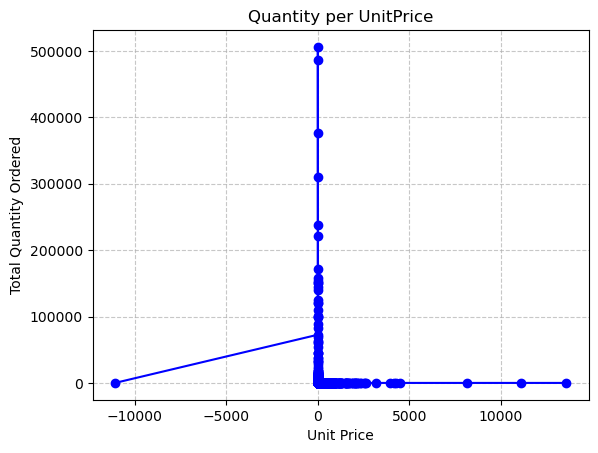

In [59]:
#8. Plot a line chart showing revenue (y) per UnitPrice (x)
revenue_per_price = online_rt.groupby('UnitPrice')['Quantity'].sum()
plt.plot(revenue_per_price.index, revenue_per_price, marker='o', linestyle='-', color='b')
plt.title('Quantity per UnitPrice')
plt.xlabel('Unit Price')
plt.ylabel('Total Quantity Ordered')
plt.grid(True, linestyle='--', alpha=0.7)  
plt.show()

In [63]:
#8.1 Group UnitPrice by intervals of 1 for prices [0,50), and sum Quantity and Revenue .
online_rt['Revenue'] = online_rt['Quantity'] * online_rt['UnitPrice']
price_intervals = pd.cut(online_rt['UnitPrice'], bins=range(0, 51, 1), right=False)
grouped_data = online_rt.groupby(price_intervals).agg({'Quantity': 'sum', 'Revenue': 'sum'})
print(grouped_data)


           Quantity      Revenue
UnitPrice                       
[0, 1)      2190070  1101322.544
[1, 2)      1847891  2698163.110
[2, 3)       837903  2024032.090
[3, 4)       243193   864294.780
[4, 5)       269734  1219569.050
[5, 6)        68129   390263.440
[6, 7)        40608   270433.630
[7, 8)        38831   296980.230
[8, 9)        46341   389275.780
[9, 10)       16484   161907.730
[10, 11)      22093   240016.810
[11, 12)       2211    25251.810
[12, 13)      15938   201846.290
[13, 14)        794    10601.790
[14, 15)       4553    67363.790
[15, 16)       1809    28233.790
[16, 17)       4998    83763.440
[17, 18)         13      227.180
[18, 19)       2068    37250.190
[19, 20)        886    17671.430
[20, 21)       1019    21145.670
[21, 22)        139     2989.410
[22, 23)          1       22.000
[23, 24)          2       46.530
[24, 25)       1620    40433.490
[25, 26)        559    14206.290
[26, 27)          4      107.180
[27, 28)          1       27.000
[28, 29)  

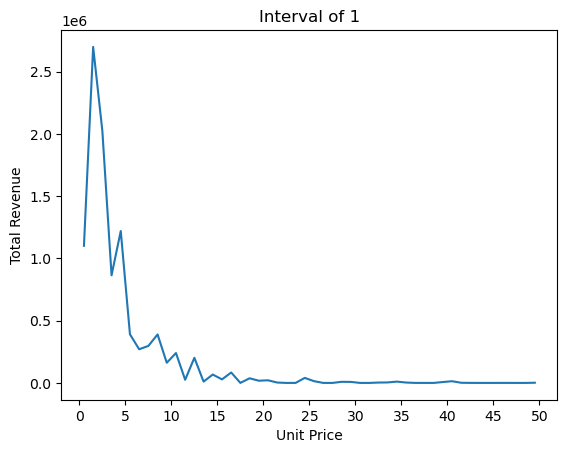

In [66]:
# 8.3 Plot.
midpoints = grouped_data.index.categories.mid

plt.plot(midpoints, grouped_data['Revenue'])
plt.title('Interval of 1')
plt.xlabel('Unit Price')
plt.ylabel('Total Revenue')
plt.xticks(range(0, 51, 5)) 
plt.show()


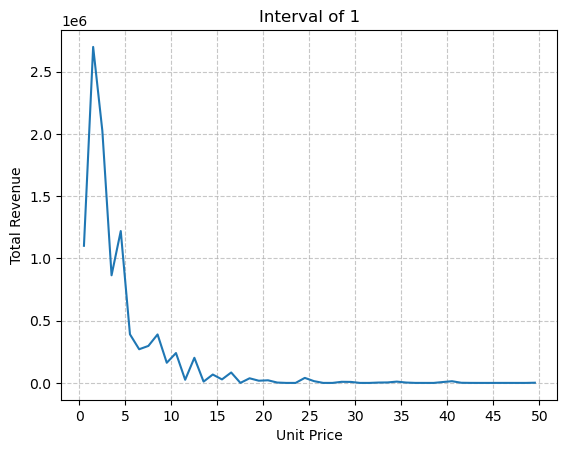

In [71]:
#8.4 Make it look nicer.
midpoints = grouped_data.index.categories.mid

plt.plot(midpoints, grouped_data['Revenue'])
plt.title('Interval of 1')
plt.xlabel('Unit Price')
plt.ylabel('Total Revenue')
plt.xticks(range(0, 51, 5))  
plt.grid (True, linestyle='--', alpha=0.7)  
plt.show()

# Q3 - Scores

In [73]:
#Step 1. Import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

In [74]:
#Step 2. Create the DataFrame that should look like the one below.
data = {
    'first_name': ['Jason', 'Molly', 'Tina', 'Jake', 'Amy'],
    'last_name': ['Miller', 'Jacobson', 'Ali', 'Milner', 'Cooze'],
    'age': [42, 52, 36, 24, 73],
    'female': [0, 1, 1, 0, 1],
    'preTestScore': [4, 24, 31, 2, 3],
    'postTestScore': [25, 94, 57, 62, 70]
}

df = pd.DataFrame(data)
print(df)

  first_name last_name  age  female  preTestScore  postTestScore
0      Jason    Miller   42       0             4             25
1      Molly  Jacobson   52       1            24             94
2       Tina       Ali   36       1            31             57
3       Jake    Milner   24       0             2             62
4        Amy     Cooze   73       1             3             70


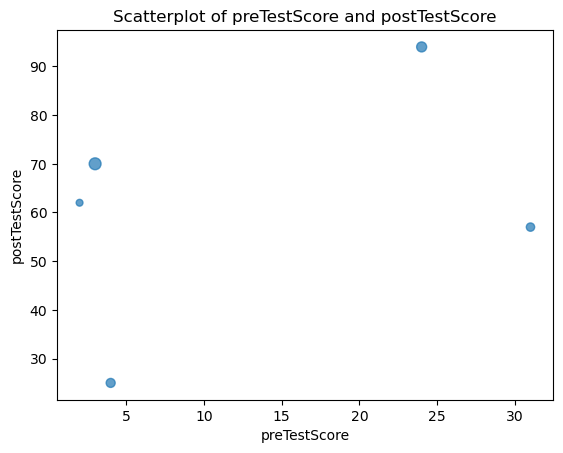

In [75]:
#Step 3. Create a Scatterplot of preTestScore and postTestScore, with the size of each point determined by age
plt.scatter(df['preTestScore'], df['postTestScore'], s=df['age'], alpha=0.7)
plt.title('Scatterplot of preTestScore and postTestScore')
plt.xlabel('preTestScore')
plt.ylabel('postTestScore')
plt.show()

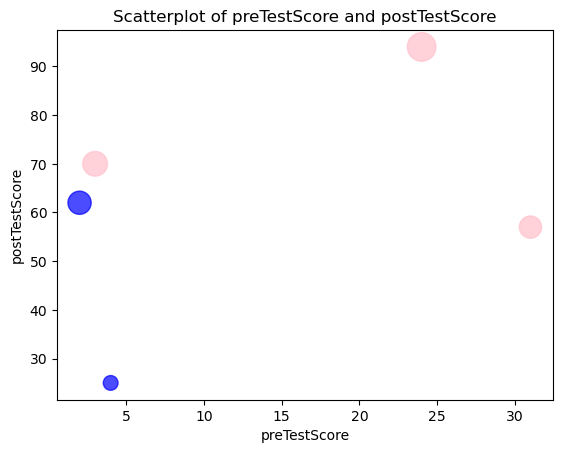

In [76]:
#Step 4. Create a Scatterplot of preTestScore and postTestScore.
colors = df['female'].map({0: 'blue', 1: 'pink'})
plt.scatter(df['preTestScore'], df['postTestScore'], s=df['postTestScore'] * 4.5, c=colors, alpha=0.7)
plt.title('Scatterplot of preTestScore and postTestScore')
plt.xlabel('preTestScore')
plt.ylabel('postTestScore')
plt.show()

In [77]:
#BONUS: Create your own question and answer it.
#Example: What is the correlation between age and postTestScore?
correlation = df['age'].corr(df['postTestScore'])
print(f'Correlation between age and postTestScore: {correlation}')

Correlation between age and postTestScore: 0.3288524695126532


# Q4 - Tips

In [43]:
#Step 1. Import the necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

In [44]:
#Step 2. Import the dataset from this address.
url = 'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Tips/tips.csv'

In [45]:
#Step 3. Assign it to a variable called tips
tips = sns.load_dataset('tips')

In [46]:
#Step 4. Delete the Unnamed 0 column
tips = tips.drop(columns=['Unnamed: 0'], errors='ignore')

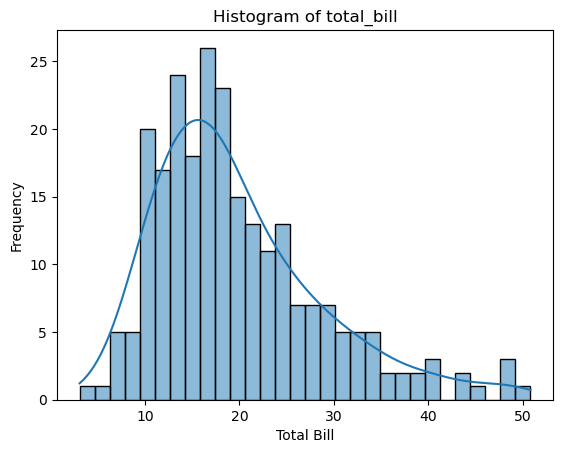

In [47]:
#Step 5. Plot the total_bill column histogram
sns.histplot(tips['total_bill'], bins=30, kde=True)
plt.title('Histogram of total_bill')
plt.xlabel('Total Bill')
plt.ylabel('Frequency')
plt.show()

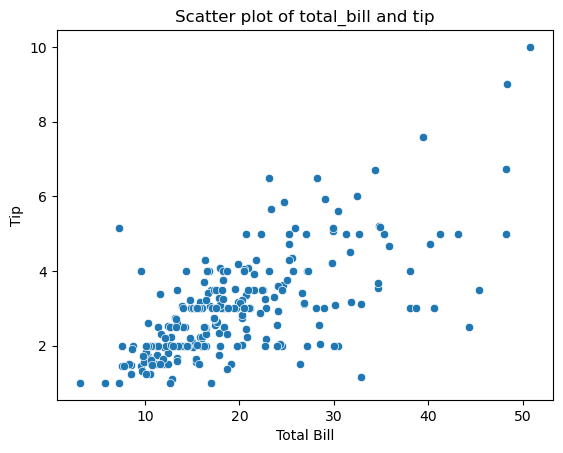

In [48]:
#Step 6. Create a scatter plot presenting the relationship between total_bill and tip
sns.scatterplot(x='total_bill', y='tip', data=tips)
plt.title('Scatter plot of total_bill and tip')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.show()

C:\Users\SMART\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


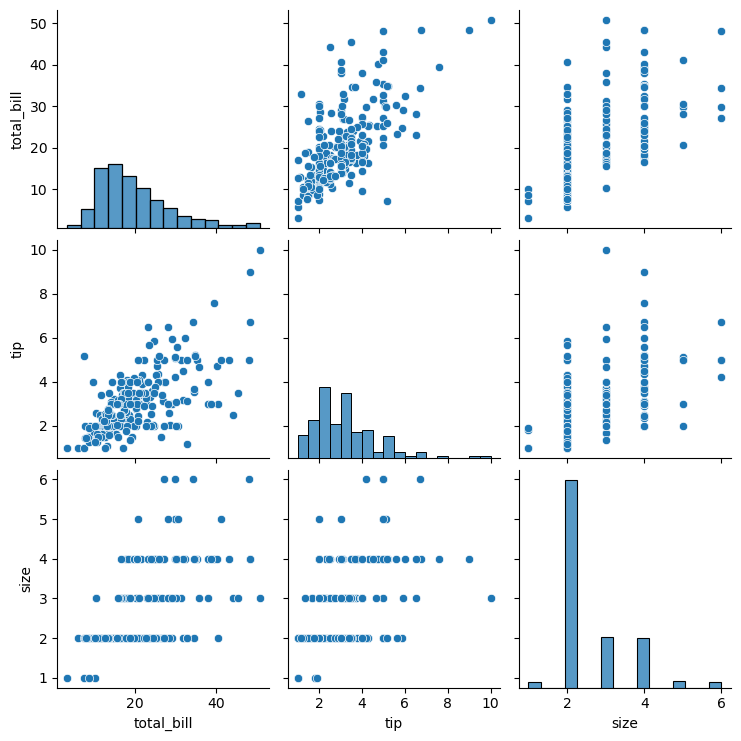

In [49]:
#Step 7. Create one image with the relationship of total_bill, tip and size.
sns.pairplot(tips, vars=['total_bill', 'tip', 'size'])
plt.show()

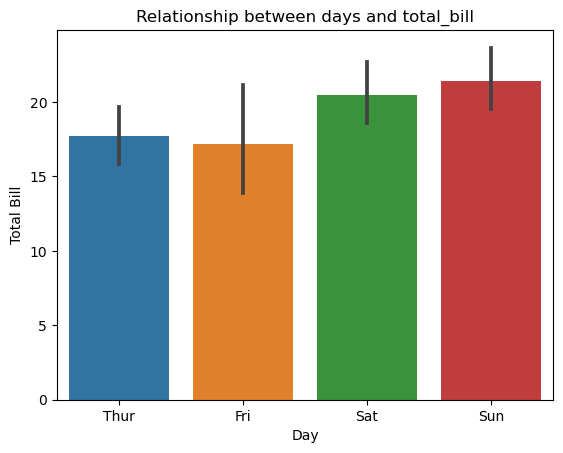

In [50]:
#Step 8. Present the relationship between days and total_bill value
sns.barplot(x='day', y='total_bill', data=tips)
plt.title('Relationship between days and total_bill')
plt.xlabel('Day')
plt.ylabel('Total Bill')
plt.show()

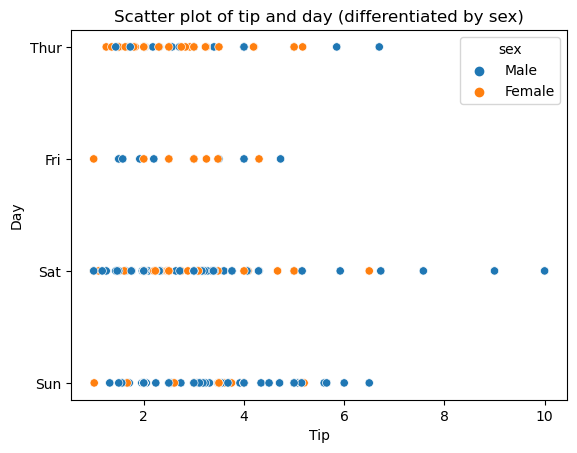

In [51]:
#Step 9. Create a scatter plot with the day as the y-axis and tip as the x-axis, differ the dots by sex
sns.scatterplot(x='tip', y='day', hue='sex', data=tips)
plt.title('Scatter plot of tip and day (differentiated by sex)')
plt.xlabel('Tip')
plt.ylabel('Day')
plt.show()

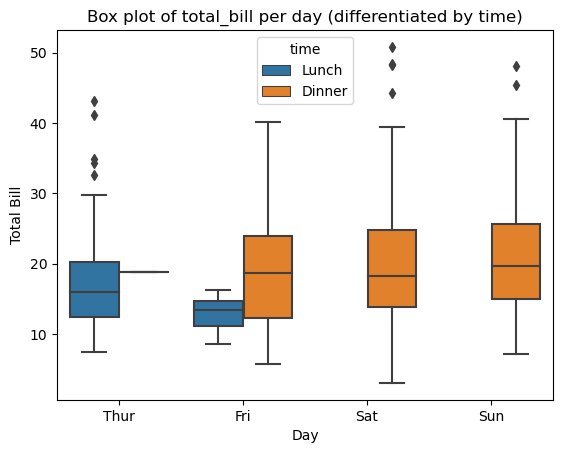

In [52]:
#Step 10. Create a box plot presenting the total_bill per day differetiation the time (Dinner or Lunch)
sns.boxplot(x='day', y='total_bill', hue='time', data=tips)
plt.title('Box plot of total_bill per day (differentiated by time)')
plt.xlabel('Day')
plt.ylabel('Total Bill')
plt.show()

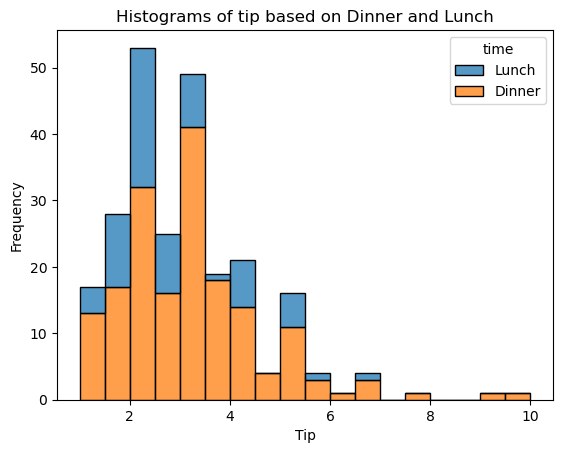

In [53]:
#Step 11. Create two histograms of the tip value based for Dinner and Lunch. They must be side by side.
sns.histplot(x='tip', hue='time', multiple='stack', data=tips)
plt.title('Histograms of tip based on Dinner and Lunch')
plt.xlabel('Tip')
plt.ylabel('Frequency')
plt.show()

C:\Users\SMART\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


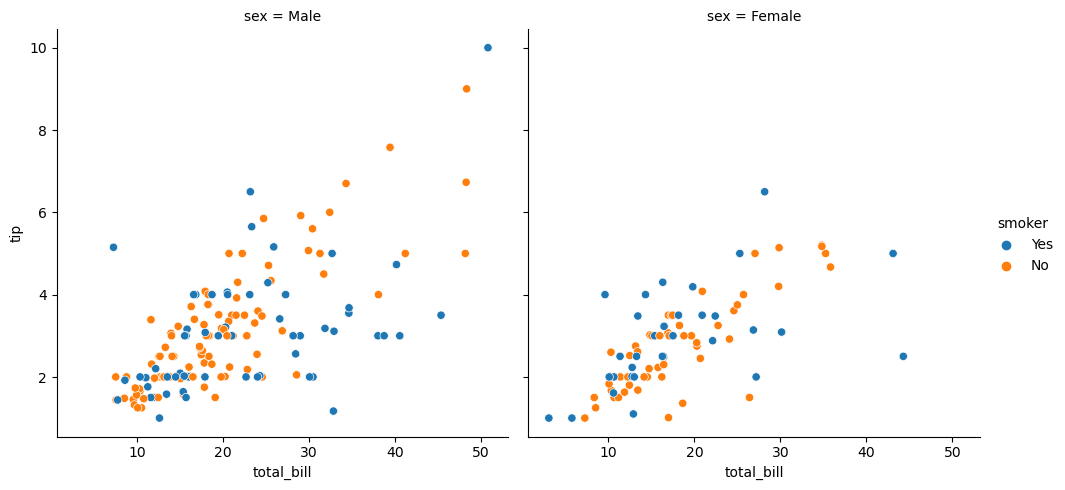

In [54]:
#Step 12. Create two scatterplots graphs, one for Male and another for Female, presenting the total_bill valuue and tip relationship, differing by smoker or no smoker
sns.relplot(x='total_bill', y='tip', hue='smoker', col='sex', data=tips)
plt.show()

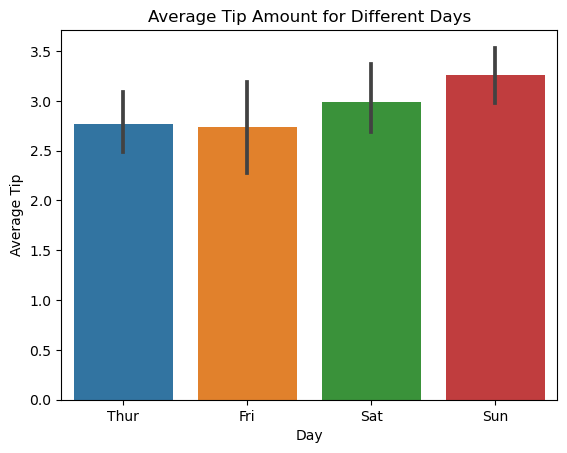

In [55]:
#BONUS:Create your own question and answer it using a graph
# Example: What is the average tip amount for different days?
sns.barplot(x='day', y='tip', data=tips)
plt.title('Average Tip Amount for Different Days')
plt.xlabel('Day')
plt.ylabel('Average Tip')
plt.show()

# Q5 - Visualizing the Titanic Disaster

In [57]:
#Step 1. Import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
#Step 2. Import the dataset from this address
url = 'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Titanic_Desaster/train.csv'

In [59]:
#Step 3. Assign it to a variable titanic
titanic = pd.read_csv(url)

In [60]:
#Step 4. Set PassengerId as the index
titanic.set_index('PassengerId', inplace=True)

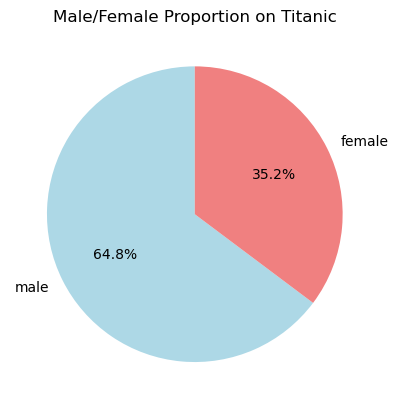

In [61]:
#Step 5. Create a pie chart presenting the male/female proportion
gender_counts = titanic['Sex'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])
plt.title('Male/Female Proportion on Titanic')
plt.show()

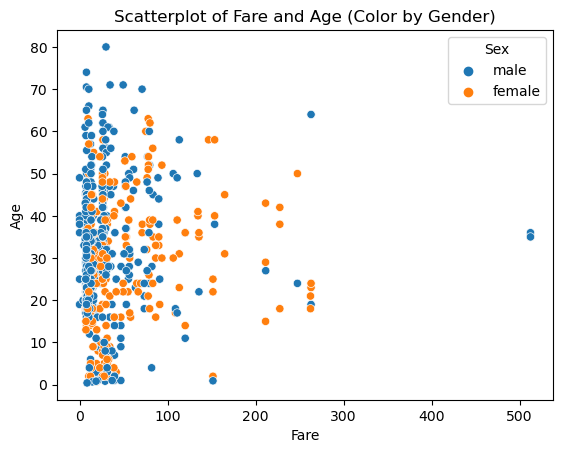

In [62]:
#Step 6. Create a scatterplot with the Fare payed and the Age, differ the plot color by gender
sns.scatterplot(x='Fare', y='Age', hue='Sex', data=titanic)
plt.title('Scatterplot of Fare and Age (Color by Gender)')
plt.xlabel('Fare')
plt.ylabel('Age')
plt.show()

In [63]:
#Step 7. How many people survived?
survived_count = titanic['Survived'].sum()
print(f'Total number of people who survived: {survived_count}')

Total number of people who survived: 342


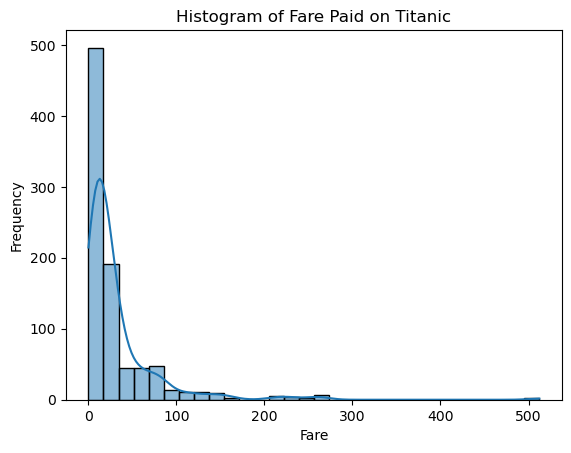

In [64]:
#Step 8. Create a histogram with the Fare payed
sns.histplot(titanic['Fare'], bins=30, kde=True)
plt.title('Histogram of Fare Paid on Titanic')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

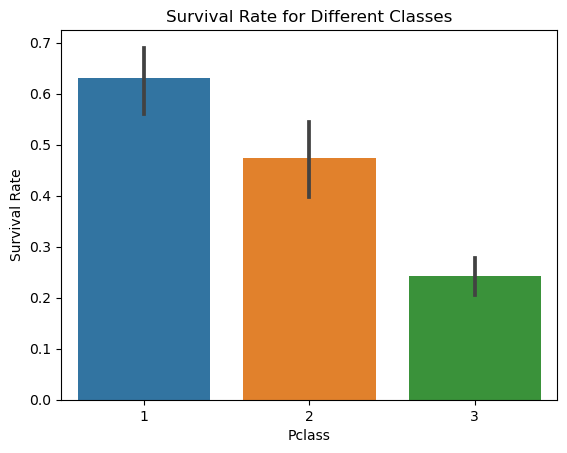

In [65]:
#BONUS: Create your own question and answer it.
# Example: What is the survival rate for different classes?
sns.barplot(x='Pclass', y='Survived', data=titanic)
plt.title('Survival Rate for Different Classes')
plt.xlabel('Pclass')
plt.ylabel('Survival Rate')
plt.show()